Script to create a less overfit variational autoencoder to our training data.

In [3]:
#high level modules
import os
import sys
import imp
import numpy as np
import pandas as pd
import pickle

# ml/ai modules
import tensorflow as tf
# Let's import some different things we will use to build the neural network
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Softmax

# import custom modules
this_dir = "/Users/steeleb/Documents/GitHub/ATS-ML-Fall2023/"
imp.load_source("settings",os.path.join(this_dir,"OutlierDetection/settings.py"))
from settings import settings
imp.load_source("tvt", os.path.join(this_dir, "02_preprocessing_outliers.py"))
from tvt import train1, val1, train2, val2, train3, val3, train4, val4, train5, val5, train6, val6
imp.load_source("architecture", os.path.join(this_dir, "OutlierDetection/architecture.py"))
from architecture import Sampling, build_encoder, build_decoder, latent_loss, VAE, compile_model
imp.load_source("universals", os.path.join(this_dir, "universal_functions.py"))
from universals import save_to_pickle, get_features_labels


For the VAE, we are actualling including all features, including what we would classically use a label. This is because the label value is as important (maybe more?) than the other values. 

We'll drop feature and date...

In [4]:
train1 = train1.drop(["feature", "date"], axis=1)
val1 = val1.drop(["feature", "date"], axis=1)
train2 = train2.drop(["feature", "date"], axis=1)
val2 = val2.drop(["feature", "date"], axis=1)
train3 = train3.drop(["feature", "date"], axis=1)
val3 = val3.drop(["feature", "date"], axis=1)
train4 = train4.drop(["feature", "date"], axis=1)
val4 = val4.drop(["feature", "date"], axis=1)
train5 = train5.drop(["feature", "date"], axis=1)
val5 = val5.drop(["feature", "date"], axis=1)
train6 = train6.drop(["feature", "date"], axis=1)
val6 = val6.drop(["feature", "date"], axis=1)


Check shapes

In [5]:
train1.shape[1:], val1.shape[1:]

((33,), (33,))

And train the models!

In [6]:

tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(settings["basic"]["random_seed"])

# define the early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
  monitor="loss", 
  patience=settings["basic"]["patience"], 
  restore_best_weights=True, 
  mode="auto"
)

## LOO 1
encoder1 = build_encoder(train1, settings["basic"])
decoder1 = build_decoder(train1, settings["basic"])

model_1 = VAE(encoder1, decoder1)

model_1 = compile_model(
  model_1, 
  settings['basic']
)

# train the model via model.fit
history_1 = model_1.fit(
  np.array(train1),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val1)],
  callbacks=[early_stopping_callback],
  verbose=1
)



Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 33)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 20)           680         ['dropout[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           210         ['dense[0][0]']                  
            

2023-12-13 15:59:09.493541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-13 15:59:09.493715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 sampling (Sampling)            (None, 3)            0           ['dense_2[0][0]',                
                                                                  'dense_3[0][0]']                
                                                                                                  
Total params: 956
Trainable params: 956
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                             

2023-12-13 15:59:09.798010: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-13 15:59:10.104419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 32.5013 - reconstruction_loss: 31.3072 - kl_loss: 5.5714e-04

2023-12-13 15:59:14.945115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 5s 101ms/step - loss: 32.4494 - reconstruction_loss: 31.3072 - kl_loss: 5.5714e-04 - val_loss: 26.6417 - val_reconstruction_loss: 26.6416 - val_kl_loss: 8.7859e-05
Epoch 2/5000
22/22 [==============================] - 0s 12ms/step - loss: 31.7680 - reconstruction_loss: 31.2640 - kl_loss: 5.7184e-05 - val_loss: 26.8089 - val_reconstruction_loss: 26.8089 - val_kl_loss: 7.9337e-05
Epoch 3/5000
22/22 [==============================] - 0s 12ms/step - loss: 32.1129 - reconstruction_loss: 31.2308 - kl_loss: 1.4019e-05 - val_loss: 27.0002 - val_reconstruction_loss: 27.0001 - val_kl_loss: 7.2406e-05
Epoch 4/5000
22/22 [==============================] - 0s 12ms/step - loss: 33.0035 - reconstruction_loss: 31.2012 - kl_loss: 8.2042e-06 - val_loss: 27.1935 - val_reconstruction_loss: 27.1935 - val_kl_loss: 6.8619e-05
Epoch 5/5000
22/22 [==============================] - 0s 11ms/step - loss: 32.5534 - reconstruction_loss: 31.1753 - kl_loss: 1.3609e-05 - val_lo

In [7]:
## LOO 2
encoder2 = build_encoder(train2, settings["basic"])
decoder2 = build_decoder(train2, settings["basic"])

model_2 = VAE(encoder2, decoder2)

model_2 = compile_model(
  model_2, 
  settings['basic']
)

# train the model via model.fit
history_2 = model_2.fit(
  np.array(train2),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val2)],
  callbacks=[early_stopping_callback],
  verbose=1
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_1 (Dropout)            (None, 33)           0           ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 20)           680         ['dropout_1[0][0]']              
                                                                                                  
 dense_8 (Dense)                (None, 10)           210         ['dense_7[0][0]']                
                                                                                            

2023-12-13 16:06:18.006572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 30.8220 - reconstruction_loss: 30.4207 - kl_loss: 7.3935e-04

2023-12-13 16:06:19.549126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 70ms/step - loss: 30.8053 - reconstruction_loss: 30.4207 - kl_loss: 7.3935e-04 - val_loss: 31.8713 - val_reconstruction_loss: 31.8711 - val_kl_loss: 1.5763e-04
Epoch 2/5000
23/23 [==============================] - 0s 11ms/step - loss: 31.7639 - reconstruction_loss: 30.3763 - kl_loss: 8.7651e-05 - val_loss: 32.0152 - val_reconstruction_loss: 32.0152 - val_kl_loss: 4.9051e-05
Epoch 3/5000
23/23 [==============================] - 0s 11ms/step - loss: 29.8929 - reconstruction_loss: 30.3493 - kl_loss: 2.4368e-05 - val_loss: 32.1492 - val_reconstruction_loss: 32.1492 - val_kl_loss: 1.9334e-05
Epoch 4/5000
23/23 [==============================] - 0s 11ms/step - loss: 31.3327 - reconstruction_loss: 30.3268 - kl_loss: 8.1890e-06 - val_loss: 32.3326 - val_reconstruction_loss: 32.3326 - val_kl_loss: 7.9210e-06
Epoch 5/5000
23/23 [==============================] - 0s 11ms/step - loss: 31.2171 - reconstruction_loss: 30.3083 - kl_loss: 3.5415e-06 - val_los

In [8]:
## LOO 3
encoder3 = build_encoder(train3, settings["basic"])
decoder3 = build_decoder(train3, settings["basic"])

model_3 = VAE(encoder3, decoder3)

model_3 = compile_model(
  model_3, 
  settings['basic']
)

# train the model via model.fit
history_3 = model_3.fit(
  np.array(train3),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val3)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 33)           0           ['input_5[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 20)           680         ['dropout_2[0][0]']              
                                                                                                  
 dense_15 (Dense)               (None, 10)           210         ['dense_14[0][0]']               
                                                                                            

2023-12-13 16:15:04.235247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 33.3765 - reconstruction_loss: 33.0845 - kl_loss: 7.5112e-04

2023-12-13 16:15:05.651722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 73ms/step - loss: 33.3619 - reconstruction_loss: 33.0845 - kl_loss: 7.5112e-04 - val_loss: 27.8654 - val_reconstruction_loss: 27.8652 - val_kl_loss: 2.5217e-04
Epoch 2/5000
19/19 [==============================] - 0s 13ms/step - loss: 33.7127 - reconstruction_loss: 32.9783 - kl_loss: 9.8431e-05 - val_loss: 28.1394 - val_reconstruction_loss: 28.1394 - val_kl_loss: 6.0536e-05
Epoch 3/5000
19/19 [==============================] - 0s 12ms/step - loss: 33.6534 - reconstruction_loss: 32.8756 - kl_loss: 2.3169e-05 - val_loss: 28.4989 - val_reconstruction_loss: 28.4989 - val_kl_loss: 5.6233e-05
Epoch 4/5000
19/19 [==============================] - 0s 12ms/step - loss: 34.5429 - reconstruction_loss: 32.7649 - kl_loss: 3.5707e-05 - val_loss: 28.9770 - val_reconstruction_loss: 28.9769 - val_kl_loss: 8.2880e-05
Epoch 5/5000
19/19 [==============================] - 0s 12ms/step - loss: 31.6681 - reconstruction_loss: 32.6470 - kl_loss: 3.6326e-04 - val_los

In [9]:
## LOO 4
encoder4 = build_encoder(train4, settings["basic"])
decoder4 = build_decoder(train4, settings["basic"])

model_4 = VAE(encoder4, decoder4)

model_4 = compile_model(
  model_4, 
  settings['basic']
)

# train the model via model.fit
history_4 = model_4.fit(
  np.array(train4),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val4)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_3 (Dropout)            (None, 33)           0           ['input_7[0][0]']                
                                                                                                  
 dense_21 (Dense)               (None, 20)           680         ['dropout_3[0][0]']              


                                                                                                  
 dense_22 (Dense)               (None, 10)           210         ['dense_21[0][0]']               
                                                                                                  
 dense_23 (Dense)               (None, 3)            33          ['dense_22[0][0]']               
                                                                                                  
 dense_24 (Dense)               (None, 3)            33          ['dense_22[0][0]']               
                                                                                                  
 sampling_3 (Sampling)          (None, 3)            0           ['dense_23[0][0]',               
                                                                  'dense_24[0][0]']               
                                                                                                  
Total para

2023-12-13 16:25:37.983925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 31.6026 - reconstruction_loss: 29.6327 - kl_loss: 2.8907e-04

2023-12-13 16:25:38.666504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 32ms/step - loss: 31.5088 - reconstruction_loss: 29.6327 - kl_loss: 2.8907e-04 - val_loss: 33.9372 - val_reconstruction_loss: 33.9371 - val_kl_loss: 9.0697e-05
Epoch 2/5000
20/20 [==============================] - 0s 14ms/step - loss: 30.8257 - reconstruction_loss: 29.5066 - kl_loss: 3.3178e-05 - val_loss: 34.4953 - val_reconstruction_loss: 34.4952 - val_kl_loss: 1.1612e-04
Epoch 3/5000
20/20 [==============================] - 0s 11ms/step - loss: 31.7201 - reconstruction_loss: 29.3717 - kl_loss: 4.8955e-05 - val_loss: 35.2306 - val_reconstruction_loss: 35.2304 - val_kl_loss: 1.6123e-04
Epoch 4/5000
20/20 [==============================] - 0s 12ms/step - loss: 30.2158 - reconstruction_loss: 29.2029 - kl_loss: 2.1712e-04 - val_loss: 36.2556 - val_reconstruction_loss: 36.2555 - val_kl_loss: 1.8804e-04
Epoch 5/5000
20/20 [==============================] - 0s 12ms/step - loss: 29.5145 - reconstruction_loss: 29.0058 - kl_loss: 7.9492e-04 - val_los

In [10]:
## LOO 5
encoder5 = build_encoder(train5, settings["basic"])
decoder5 = build_decoder(train5, settings["basic"])

model_5 = VAE(encoder5, decoder5)

model_5 = compile_model(
  model_5, 
  settings['basic']
)

# train the model via model.fit
history_5 = model_5.fit(
  np.array(train5),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val5)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 dropout_4 (Dropout)            (None, 33)           0           ['input_9[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 20)           680         ['dropout_4[0][0]']              
                                                                                                  
 dense_29 (Dense)               (None, 10)           210         ['dense_28[0][0]']               
                                                                                            

2023-12-13 16:31:17.691199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 31.0193 - reconstruction_loss: 29.8801 - kl_loss: 6.3957e-04

2023-12-13 16:31:18.625565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 63ms/step - loss: 30.9676 - reconstruction_loss: 29.8801 - kl_loss: 6.3957e-04 - val_loss: 33.7616 - val_reconstruction_loss: 33.7614 - val_kl_loss: 1.9571e-04
Epoch 2/5000
21/21 [==============================] - 0s 13ms/step - loss: 29.6459 - reconstruction_loss: 29.7514 - kl_loss: 9.0300e-05 - val_loss: 34.2761 - val_reconstruction_loss: 34.2760 - val_kl_loss: 6.2378e-05
Epoch 3/5000
21/21 [==============================] - 0s 12ms/step - loss: 29.1952 - reconstruction_loss: 29.6330 - kl_loss: 3.5577e-05 - val_loss: 34.9247 - val_reconstruction_loss: 34.9247 - val_kl_loss: 3.1884e-05
Epoch 4/5000
21/21 [==============================] - 0s 12ms/step - loss: 29.4204 - reconstruction_loss: 29.5191 - kl_loss: 3.1017e-05 - val_loss: 35.7810 - val_reconstruction_loss: 35.7810 - val_kl_loss: 4.7757e-05
Epoch 5/5000
21/21 [==============================] - 0s 11ms/step - loss: 31.3626 - reconstruction_loss: 29.4295 - kl_loss: 8.4434e-04 - val_los

In [11]:
## LOO 6
encoder6 = build_encoder(train6, settings["basic"])
decoder6 = build_decoder(train6, settings["basic"])

model_6 = VAE(encoder6, decoder6)

model_6 = compile_model(
  model_6, 
  settings['basic']
)

# train the model via model.fit
history_6 = model_6.fit(
  np.array(train6),
  epochs=settings['basic']["max_epochs"],
  batch_size=settings['basic']["batch_size"],
  shuffle=True,
  validation_data=[np.array(val6)],
  callbacks=[early_stopping_callback],
  verbose=1
)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 33)]         0           []                               
                                                                                                  
 dropout_5 (Dropout)            (None, 33)           0           ['input_11[0][0]']               
                                                                                                  
 dense_35 (Dense)               (None, 20)           680         ['dropout_5[0][0]']              
                                                                                                  
 dense_36 (Dense)               (None, 10)           210         ['dense_35[0][0]']               
                                                                                           

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_39 (Dense)            (None, 10)                40        
                                                                 
 dense_40 (Dense)            (None, 20)                220       
                                                                 
 dense_41 (Dense)            (None, 33)                693       
                                                                 
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000


2023-12-13 16:36:04.564411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 32.9900 - reconstruction_loss: 31.8700 - kl_loss: 8.1140e-04

2023-12-13 16:36:06.258995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 76ms/step - loss: 32.9433 - reconstruction_loss: 31.8700 - kl_loss: 8.1140e-04 - val_loss: 20.6465 - val_reconstruction_loss: 20.6463 - val_kl_loss: 1.5972e-04
Epoch 2/5000
23/23 [==============================] - 0s 12ms/step - loss: 33.4257 - reconstruction_loss: 31.8379 - kl_loss: 7.7100e-05 - val_loss: 20.7395 - val_reconstruction_loss: 20.7395 - val_kl_loss: 5.7367e-05
Epoch 3/5000
23/23 [==============================] - 0s 12ms/step - loss: 33.4360 - reconstruction_loss: 31.8104 - kl_loss: 1.5768e-05 - val_loss: 20.8435 - val_reconstruction_loss: 20.8435 - val_kl_loss: 4.3604e-05
Epoch 4/5000
23/23 [==============================] - 0s 12ms/step - loss: 32.0708 - reconstruction_loss: 31.7896 - kl_loss: 6.2041e-06 - val_loss: 20.9364 - val_reconstruction_loss: 20.9364 - val_kl_loss: 3.0821e-05
Epoch 5/5000
23/23 [==============================] - 0s 11ms/step - loss: 31.7184 - reconstruction_loss: 31.7710 - kl_loss: 3.8967e-06 - val_los

And now we'll save all the models and histories to pickle files.

In [14]:
# import training data
file_path = "/Users/steeleb/OneDrive - Colostate/NASA-Northern/data/NN_train_val_test/"
fn = os.path.join(file_path, "test_set_2021_forward_v2023-12-10.csv")
with open(fn) as f:
    test = pd.read_csv(f, sep=',')

test = test.drop(["feature", "date"], axis=1)

# we need to preprocess these data according to their distribuions and ranges. 
### Precip data needs log transformation before standardization due to histo frequency.
### Wind data needs sqrt transormation.
precip_vars = test.filter(like='precip').columns
wind_vars = test.filter(like="wind").columns

# first, we'll trasform the precip and wind vars
precip = test.filter(like='precip')
### add 0.0001 to values in all columns of precip, since we need to log-transform the values and there are zeros
precip += 0.0001
precip = np.log(precip)

### and sqrt transform the wind vars
wind = test.filter(like='wind')
wind = np.sqrt(wind)

# remove the precip and wind vars from df
test = test.drop(columns=precip_vars)
test = test.drop(columns=wind_vars)
# add the transformed precip and wind vars to df
test = test.join(precip)
test = test.join(wind)

fn = os.path.join(file_path, "mean_std_training_v2023-11-08.csv")
with open(fn) as f:
    mean_std = pd.read_csv(f, sep=',')

# set indes to first column
mean_std = mean_std.set_index('Unnamed: 0')
# now, we'll standardize the data so that all the values are between -1 and 1.
def standardize_column(test, col_name, mean, std):
    col = test[col_name]
    return (col - mean) / std

# apply standardize_column function to all columns of df
test_standardized = test.apply(lambda col: standardize_column(test, col.name, mean_std.loc[col.name, 'mean'], mean_std.loc[col.name, 'std']))


In [16]:
pred_1 = model_1.predict(np.array(test_standardized))
pred_2 = model_2.predict(np.array(test_standardized))
pred_3 = model_3.predict(np.array(test_standardized))
pred_4 = model_4.predict(np.array(test_standardized))
pred_5 = model_5.predict(np.array(test_standardized))
pred_6 = model_6.predict(np.array(test_standardized))

 1/12 [=>............................] - ETA: 1s

2023-12-13 17:18:14.508716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 8ms/step


2023-12-13 17:18:15.004534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 8ms/step


2023-12-13 17:18:15.229556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 7ms/step


2023-12-13 17:18:15.521838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-13 17:18:15.701302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 8ms/step


2023-12-13 17:18:15.924459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


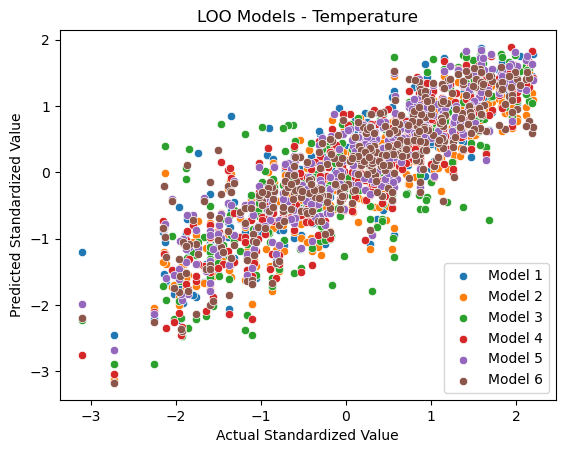

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt

actual = np.array(test_standardized["value"])
predicted_m1 = pred_1[:, 5]
predicted_m2 = pred_2[:, 5]
predicted_m3 = pred_3[:, 5]
predicted_m4 = pred_4[:, 5]
predicted_m5 = pred_5[:, 5]
predicted_m6 = pred_6[:, 5]

plt.figure()
sb.scatterplot(x=actual, y=predicted_m1)
sb.scatterplot(x=actual, y=predicted_m2)
sb.scatterplot(x=actual, y=predicted_m3)
sb.scatterplot(x=actual, y=predicted_m4)
sb.scatterplot(x=actual, y=predicted_m5)
sb.scatterplot(x=actual, y=predicted_m6)
plt.title("LOO Models - Temperature")
plt.legend(["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"])
plt.xlabel("Actual Standardized Value")
plt.ylabel("Predicted Standardized Value")
plt.savefig(os.path.join(dump_dir, "loo_models_basic.png"))
plt.show()
